In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
file_name = './../../../2021/2021_stat.csv'
table = pd.read_csv(file_name, low_memory=False).dropna()
table.columns

KeyboardInterrupt: 

In [3]:
table = table[[
    'ORIG_RATE', 'ORIG_AMOUNT', 'ORIG_TERM', 'OLTV', 'NUM_BO', 'DTI', 'CSCORE_B', # 'CSCORE_C', 
    'FTHB_FLAG', 'PURPOSE', 'PROP_TYPE', 'NUM_UNIT', 'OCC_STAT', 'MI_PCT', 'MI_TYPE', 'DLQ_FLAG',
    'Ongoing', 'Current_DLQ', 'Prepaid_Matured'
]]
table = table[ (table['DLQ_FLAG'] == 1) | ( (table['DLQ_FLAG'] == 0) & (table['Ongoing'] == 1) ) ]
table = table.drop(columns=[ 'Ongoing', 'Current_DLQ', 'Prepaid_Matured'])


# Sample 200 examples per class
subset_ = table.groupby('DLQ_FLAG').sample(n=200, random_state=42)

print(subset_['DLQ_FLAG'].value_counts())
table

NameError: name 'table' is not defined

DLQ_FLAG
0    200
1    200
Name: count, dtype: int64


,ORIG_RATE,ORIG_AMOUNT,ORIG_TERM,OLTV,NUM_BO,DTI,CSCORE_B,FTHB_FLAG,PURPOSE,PROP_TYPE,NUM_UNIT,OCC_STAT,MI_PCT,MI_TYPE,DLQ_FLAG
3700659,2.75,238000.0,360,95.0,1,44.0,759.0,0,P,SF,1,P,30.0,BPMI,0
2328082,3.50,287000.0,360,90.0,1,45.0,767.0,1,P,CO,1,P,25.0,BPMI,0
920768,2.62,449000.0,360,90.0,2,28.0,766.0,0,P,PU,1,S,25.0,BPMI,0
702913,2.75,225000.0,360,90.0,2,39.0,697.0,0,P,SF,1,P,25.0,BPMI,0
4375603,3.38,355000.0,360,97.0,1,30.0,704.0,1,P,PU,1,P,35.0,BPMI,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707930,1.75,428000.0,180,92.0,2,37.0,715.0,0,R,CO,1,P,25.0,BPMI,1
3012804,2.88,332000.0,360,95.0,1,46.0,727.0,0,P,SF,1,P,30.0,BPMI,1
1893298,3.12,108000.0,360,95.0,1,14.0,765.0,1,P,SF,1,P,30.0,BPMI,1
1390471,2.75,226000.0,360,95.0,1,18.0,728.0,0,R,PU,1,P,30.0,BPMI,1


In [33]:
# Temporary one-hot encoding for corr matrix
one_hot_cols = ['PURPOSE', 'PROP_TYPE', 'OCC_STAT', 'MI_TYPE']


In [34]:
one_hot_table = table.copy()
one_hot = pd.get_dummies(table[one_hot_cols], dtype=int)
# Drop column B as it is now encoded
one_hot_table = one_hot_table.drop(columns=one_hot_cols,axis = 1)
# Join the encoded df
one_hot_table = one_hot_table.join(one_hot)
one_hot_table

,ORIG_RATE,ORIG_AMOUNT,ORIG_TERM,OLTV,NUM_BO,DTI,CSCORE_B,FTHB_FLAG,NUM_UNIT,MI_PCT,...,PROP_TYPE_CP,PROP_TYPE_MH,PROP_TYPE_PU,PROP_TYPE_SF,OCC_STAT_I,OCC_STAT_P,OCC_STAT_S,MI_TYPE_BPMI,MI_TYPE_IPMI,MI_TYPE_LPMI
3,2.75,715000.0,360,92.0,1,35.0,801.0,1,1,30.0,...,0,0,0,1,0,1,0,1,0,0
12,2.50,680000.0,360,90.0,2,26.0,789.0,1,1,25.0,...,0,0,0,1,0,1,0,1,0,0
19,2.69,651000.0,360,89.0,1,48.0,796.0,0,1,25.0,...,0,0,0,0,0,1,0,0,0,1
29,2.88,551000.0,360,95.0,2,46.0,780.0,0,1,30.0,...,0,0,1,0,0,1,0,1,0,0
33,2.88,578000.0,360,85.0,2,41.0,755.0,0,1,12.0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782064,3.25,463000.0,360,97.0,2,31.0,716.0,1,1,35.0,...,0,0,0,1,0,1,0,1,0,0
4782072,3.00,229000.0,360,83.0,1,28.0,794.0,1,1,12.0,...,0,0,0,1,0,1,0,1,0,0
4782079,3.62,180000.0,360,90.0,1,47.0,704.0,0,1,25.0,...,0,0,0,1,0,1,0,1,0,0
4782088,2.99,450000.0,360,90.0,1,36.0,740.0,1,1,25.0,...,0,0,0,0,0,1,0,1,0,0


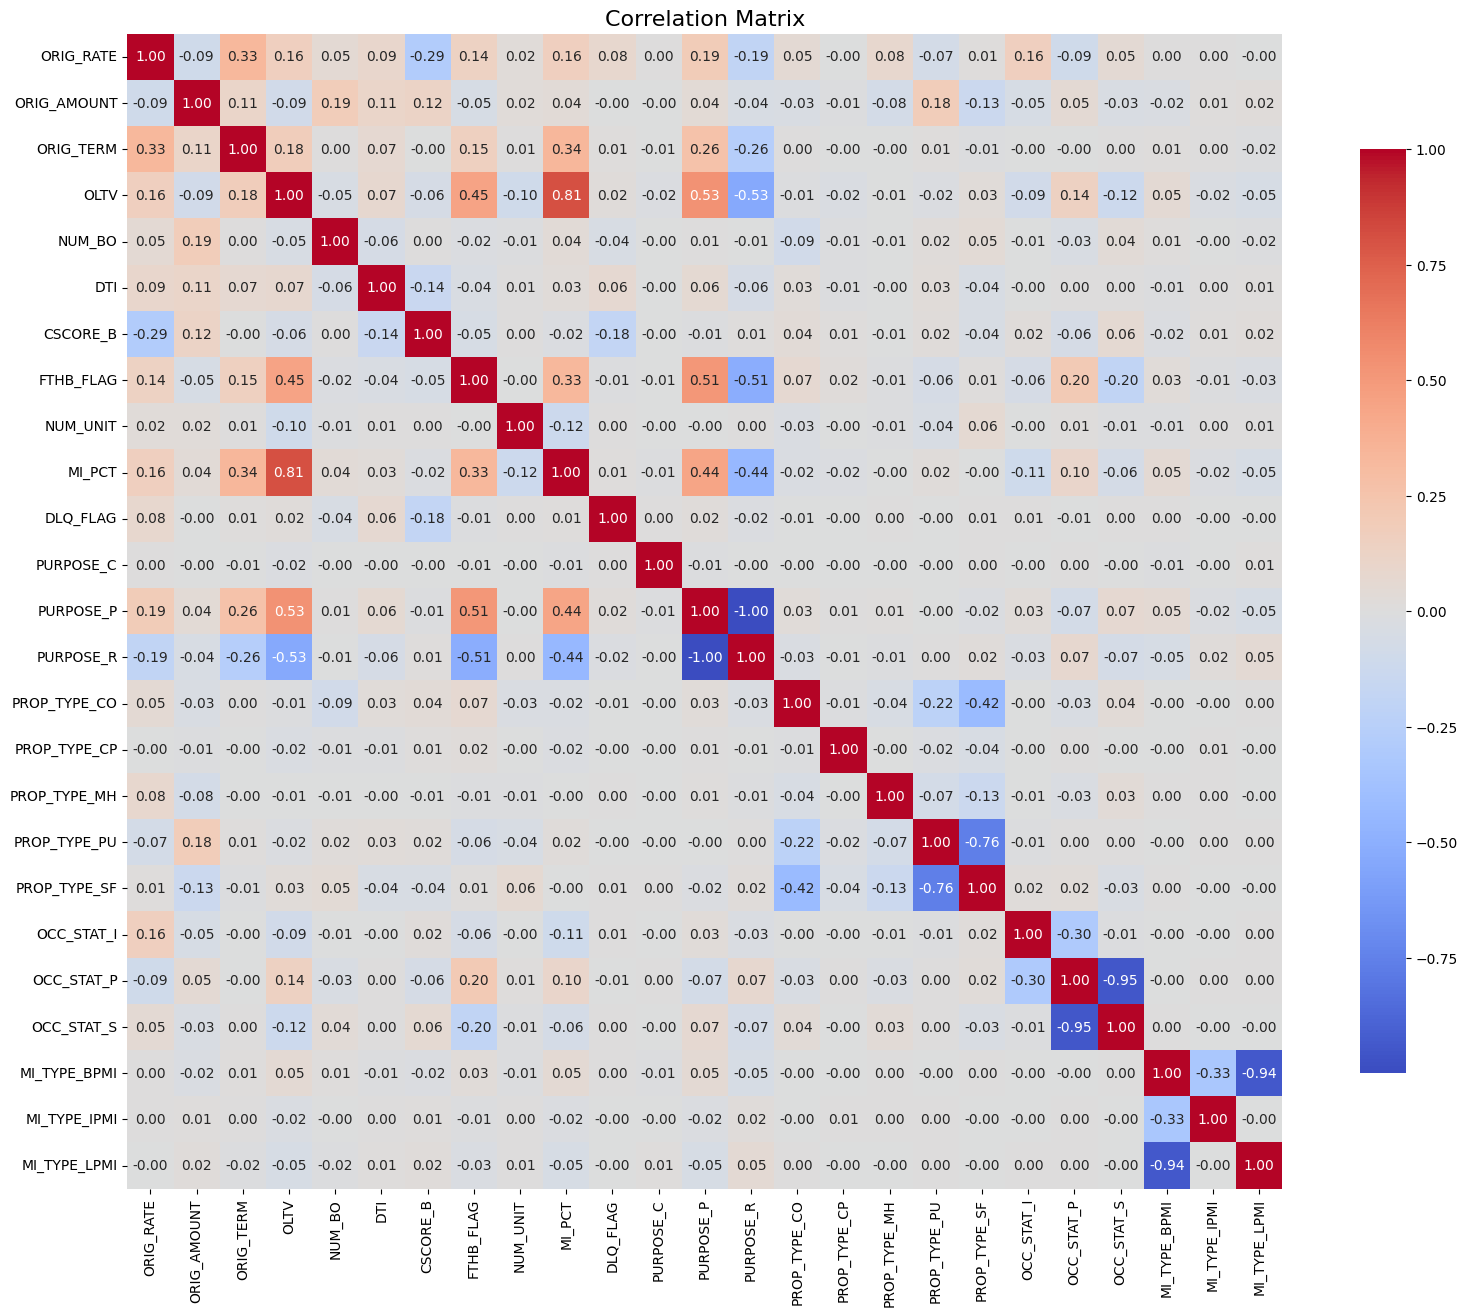

In [35]:
# Compute matrix
correlation_matrix = one_hot_table.corr()
# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, 
             annot=True, 
             fmt=".2f", 
             cmap='coolwarm', 
             square=True, 
             cbar_kws={"shrink": .8}
            )
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [37]:
table

,ORIG_RATE,ORIG_AMOUNT,ORIG_TERM,OLTV,NUM_BO,DTI,CSCORE_B,FTHB_FLAG,PURPOSE,PROP_TYPE,NUM_UNIT,OCC_STAT,MI_PCT,MI_TYPE,DLQ_FLAG
3,2.75,715000.0,360,92.0,1,35.0,801.0,1,P,SF,1,P,30.0,BPMI,0
12,2.50,680000.0,360,90.0,2,26.0,789.0,1,P,SF,1,P,25.0,BPMI,0
19,2.69,651000.0,360,89.0,1,48.0,796.0,0,P,CO,1,P,25.0,LPMI,0
29,2.88,551000.0,360,95.0,2,46.0,780.0,0,P,PU,1,P,30.0,BPMI,0
33,2.88,578000.0,360,85.0,2,41.0,755.0,0,R,CO,1,P,12.0,BPMI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782064,3.25,463000.0,360,97.0,2,31.0,716.0,1,P,SF,1,P,35.0,BPMI,0
4782072,3.00,229000.0,360,83.0,1,28.0,794.0,1,P,SF,1,P,12.0,BPMI,0
4782079,3.62,180000.0,360,90.0,1,47.0,704.0,0,P,SF,1,P,25.0,BPMI,0
4782088,2.99,450000.0,360,90.0,1,36.0,740.0,1,P,CO,1,P,25.0,BPMI,0


In [38]:
X = table.drop(columns=['DLQ_FLAG'])
Y = table['DLQ_FLAG']

In [41]:

num_col = ['ORIG_RATE', 'ORIG_AMOUNT', 'ORIG_TERM', 'OLTV', 'NUM_BO', 'DTI', 'CSCORE_B', # 'CSCORE_C', 
           'NUM_UNIT', 'MI_PCT']
cat_col = ['FTHB_FLAG', 'PURPOSE', 'OCC_STAT', 'MI_TYPE']
scaler = StandardScaler()
X[num_col] = scaler.fit_transform(X[num_col])
X = pd.concat([X[num_col], X[cat_col]], axis=1)

X

,ORIG_RATE,ORIG_AMOUNT,ORIG_TERM,OLTV,NUM_BO,DTI,CSCORE_B,NUM_UNIT,MI_PCT,FTHB_FLAG,PURPOSE,OCC_STAT,MI_TYPE
3,-0.872966,2.940144,0.225114,-0.038409,-0.801762,-0.138630,1.269432,-0.070856,0.631648,1,P,P,BPMI
12,-1.581097,2.689948,0.225114,-0.491440,1.128161,-1.175546,0.972374,-0.070856,-0.070136,1,P,P,BPMI
19,-1.042918,2.482643,0.225114,-0.717956,-0.801762,1.359136,1.145658,-0.070856,-0.070136,0,P,P,LPMI
29,-0.504738,1.767798,0.225114,0.641138,1.128161,1.128711,0.749581,-0.070856,0.631648,0,P,P,BPMI
33,-0.504738,1.960806,0.225114,-1.624018,1.128161,0.552646,0.130710,-0.070856,-1.894775,0,R,P,BPMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782064,0.543295,1.138735,0.225114,1.094169,1.128161,-0.599482,-0.834728,-0.070856,1.333432,1,P,P,BPMI
4782072,-0.164835,-0.534002,0.225114,-2.077049,-0.801762,-0.945120,1.096148,-0.070856,-1.894775,1,P,P,BPMI
4782079,1.591329,-0.884276,0.225114,-0.491440,-0.801762,1.243923,-1.131786,-0.070856,-0.070136,0,P,P,BPMI
4782088,-0.193161,1.045805,0.225114,-0.491440,-0.801762,-0.023418,-0.240612,-0.070856,-0.070136,1,P,P,BPMI


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=9)


In [46]:
X_train

,ORIG_RATE,ORIG_AMOUNT,ORIG_TERM,OLTV,NUM_BO,DTI,CSCORE_B,NUM_UNIT,MI_PCT,FTHB_FLAG,PURPOSE,OCC_STAT,MI_TYPE
196936,-0.504738,-0.333846,0.225114,0.641138,-0.801762,0.898285,-1.181296,-0.070856,-0.070136,1,P,P,BPMI
3523908,1.251426,0.888539,0.225114,-0.491440,-0.801762,-0.945120,-1.973450,-0.070856,-0.070136,0,P,P,BPMI
3349575,-0.504738,1.531899,0.225114,-0.491440,1.128161,-1.521184,0.303994,-0.070856,-0.070136,0,P,P,BPMI
1788664,-1.581097,-1.291738,0.225114,1.094169,1.128161,0.667859,-1.008012,-0.070856,-0.070136,1,P,P,BPMI
63868,-0.504738,1.653423,0.225114,-1.170987,-0.801762,-0.714694,-0.710954,-0.070856,-0.070136,1,P,P,BPMI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119878,1.251426,-0.727010,0.225114,1.094169,-0.801762,0.207008,0.477277,-0.070856,-1.052634,1,P,P,BPMI
4216957,-0.164835,-0.798495,0.225114,-0.944471,1.128161,-0.369056,0.724826,-0.070856,-0.070136,1,P,P,BPMI
2778700,0.911523,-0.498260,0.225114,-2.077049,1.128161,0.898285,-1.453599,-0.070856,-1.894775,0,P,P,BPMI
4161977,-0.872966,-1.313183,-3.257832,0.188107,1.128161,-2.442887,0.006936,-0.070856,-0.070136,1,P,P,BPMI
